# Import and Loadings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
style_dict={
    'axes.facecolor': '#49515f',
    'axes.edgecolor': 'white',
    'axes.grid': True,
    'axes.axisbelow': True,
    'axes.labelcolor': 'white',
    'figure.facecolor': '#49515f',
    'grid.color': 'white',
    'grid.linestyle': '-',
    'text.color': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'lines.solid_capstyle': 'round',
    'patch.edgecolor': 'white',
    'patch.force_edgecolor': True,
    'image.cmap': 'rocket',
    'font.sans-serif': ['Arial',
      'DejaVu Sans',
      'Liberation Sans',
      'Bitstream Vera Sans',
      'sans-serif'],
    'xtick.bottom': False,
    'xtick.top': False,
    'ytick.left': False,
    'ytick.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.right': False,
    'axes.spines.top': False
}
sns.set_style("whitegrid", rc=style_dict)


In [3]:
col_info = pd.read_excel("dataset.xlsx", sheet_name="Data Dict", header=1, usecols=[1,2])
col_info

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or...
9,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [4]:
df = pd.read_excel("dataset.xlsx", sheet_name="dataset")

In [5]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1.0,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1.0,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1.0,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,NaN,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1.0,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5357 non-null   float64
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# EDA

0.0    4553
1.0     804
Name: Churn, dtype: int64


<Axes: xlabel='Churn', ylabel='count'>

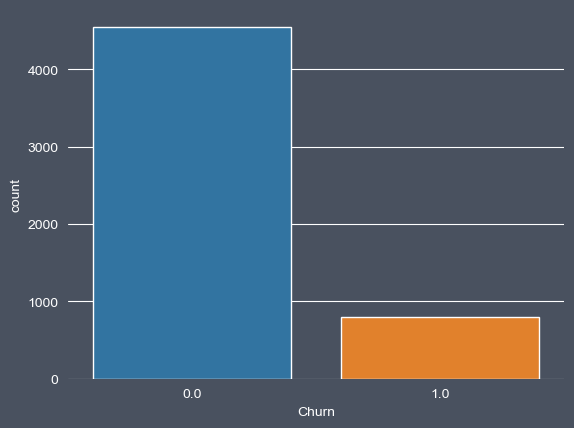

In [7]:
print(df["Churn"].value_counts())
sns.countplot(data=df, x="Churn")

#### The target value "Churn" is inbalance, this is important for us to make decision in data analytics and modeling

-----------------

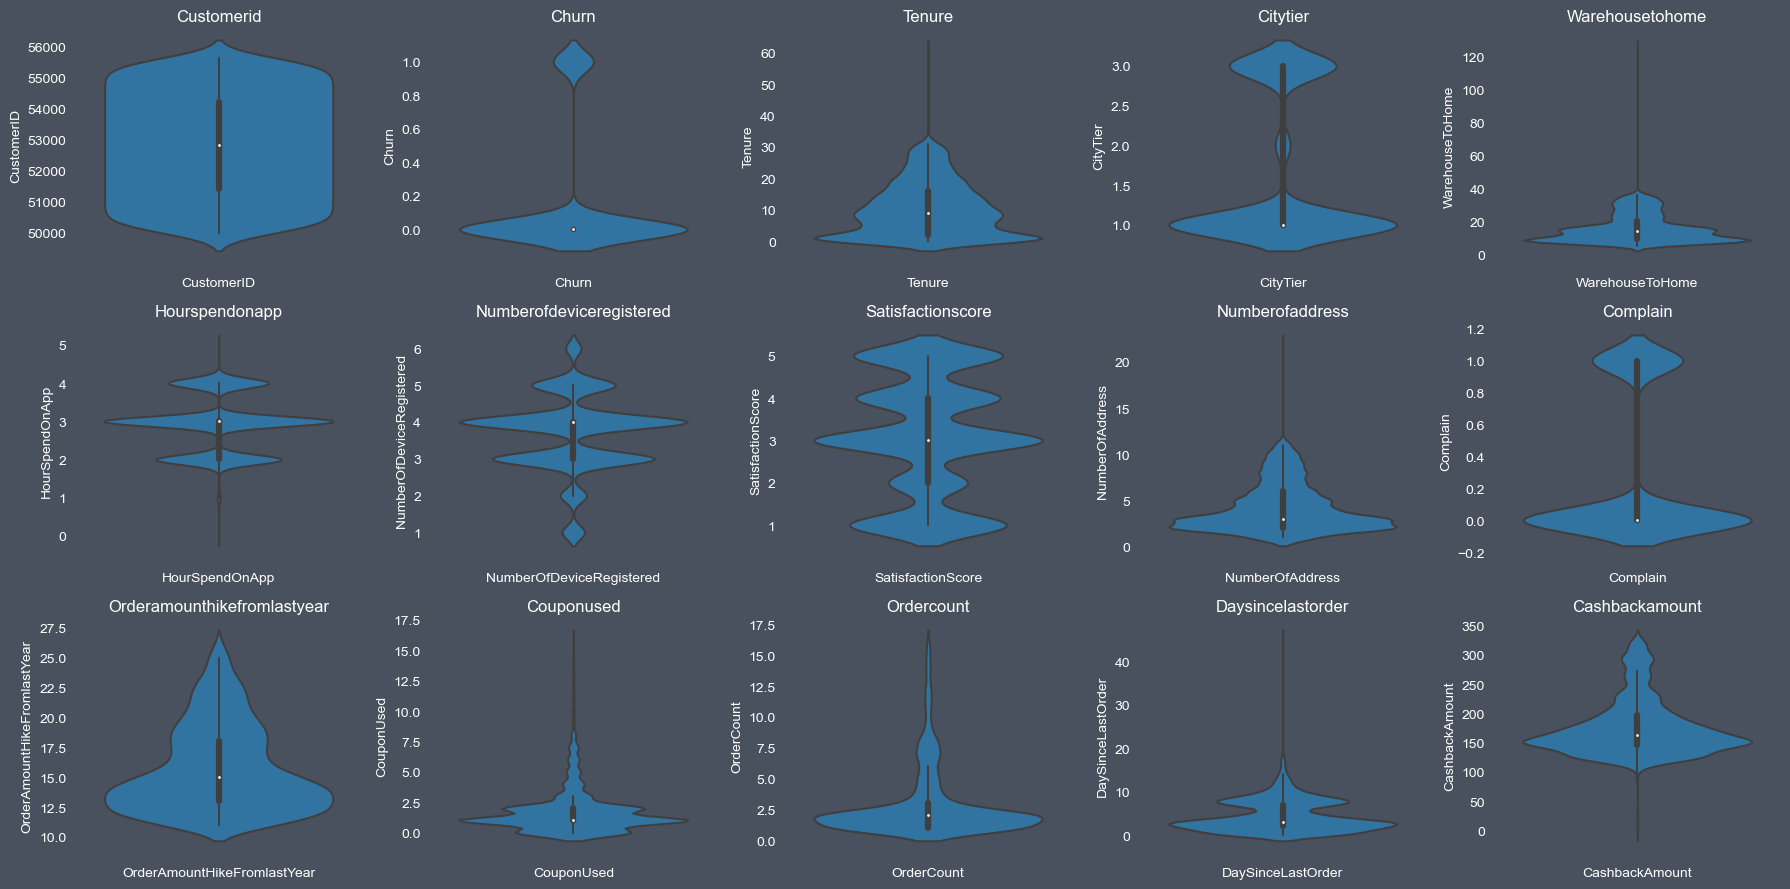

In [8]:
num_cols = df.select_dtypes(include='number').columns.tolist()

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18, 9))

axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.violinplot(ax=axes[i], data=df, y=col)
    axes[i].set(title=col.capitalize(), xlabel=col)
    axes[i].grid(False)
    
plt.tight_layout()
plt.show()

#### I can see that there are outliers in Tenure, Warehousetohome, NumberOfAddress, CouponUsed, DaysSinceLastOrder and CashbackAmount.
This is relevant to our choice of model or wether we want to remove these outliers or no.

-------------

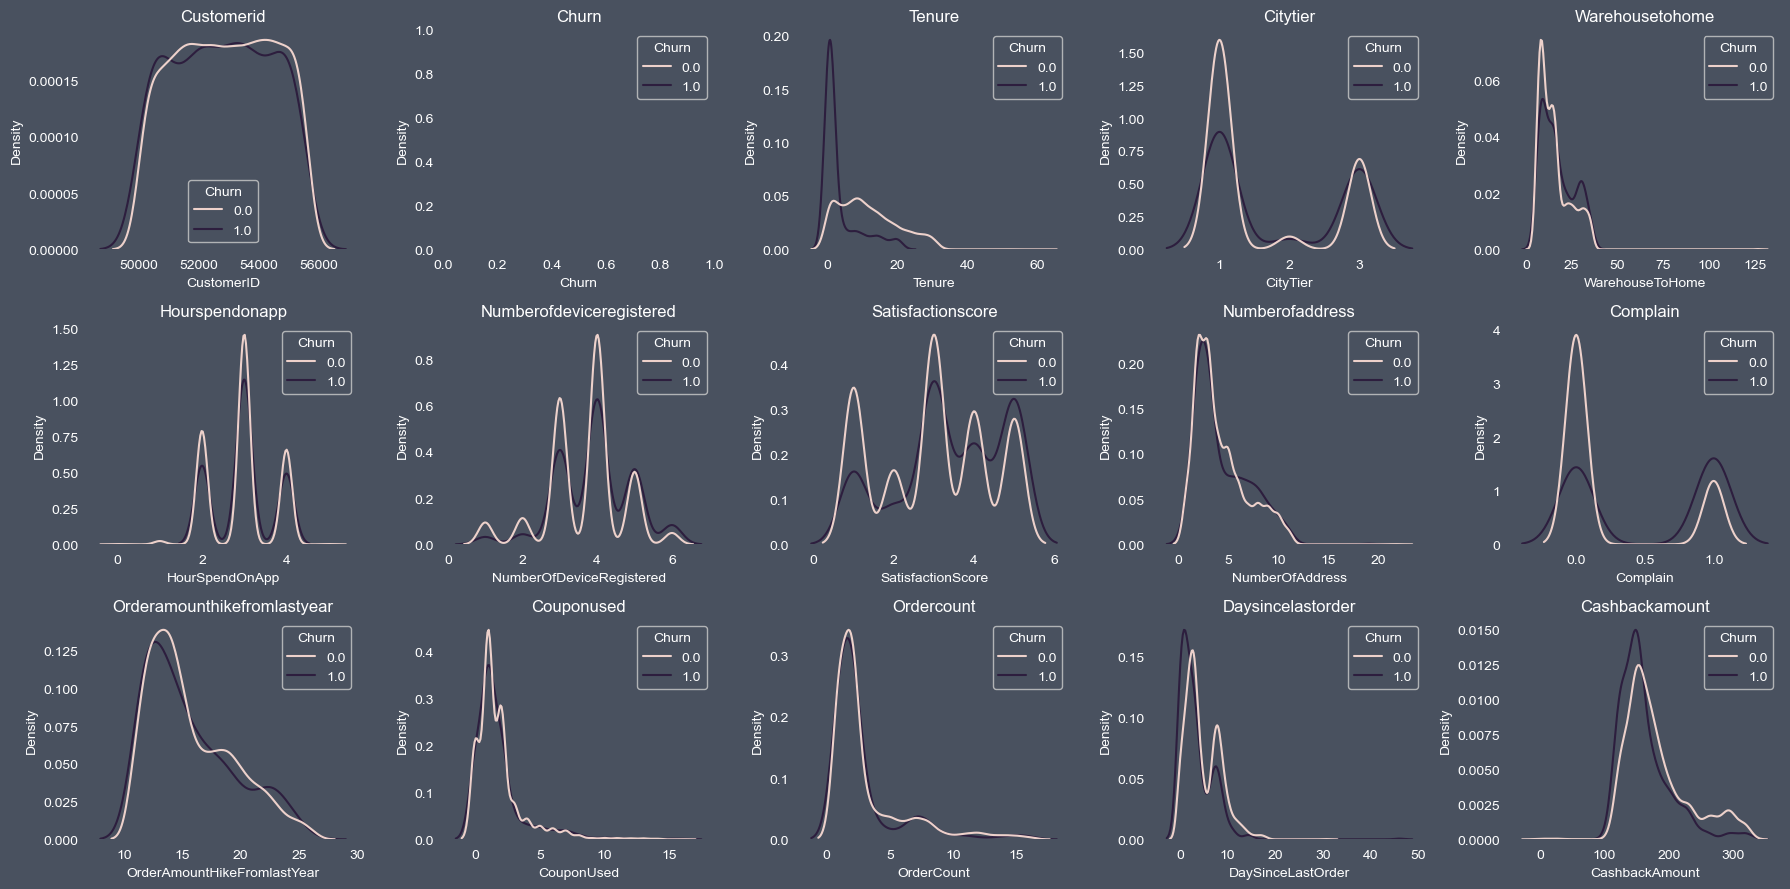

In [9]:
num_cols = df.select_dtypes(include='number').columns.tolist()

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18, 9))

axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.kdeplot(ax=axes[i], data=df, x=col, hue="Churn", common_norm=False, warn_singular=False)
    axes[i].set(title=col.capitalize(), xlabel=col)
    axes[i].grid(False)
plt.tight_layout()
plt.show()

#### Here we can see that there is noticable difference between people who churned and who didn't.
Here we can see Tenure is our first candidate for the best predictor of churn.
The second best predictor seems to the Complain column.
Following those columns, SatisfactionScore and CityTier seem to show some information about churn.
----------

<Axes: >

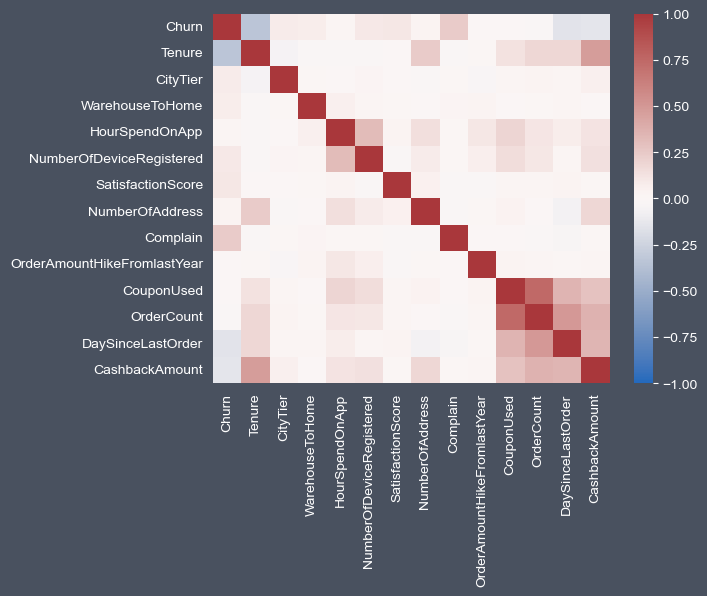

In [10]:
sns.heatmap(df[num_cols].drop("CustomerID", axis=1).corr(), vmin=-1, vmax=1, cmap="vlag")

#### There arenn't strongly correlated columns with Churn, as I have mentioned the biggest ones seem to be Tenure and Complain.
We also see few columns to be correlated with each other which affects our choice of model.

-----------

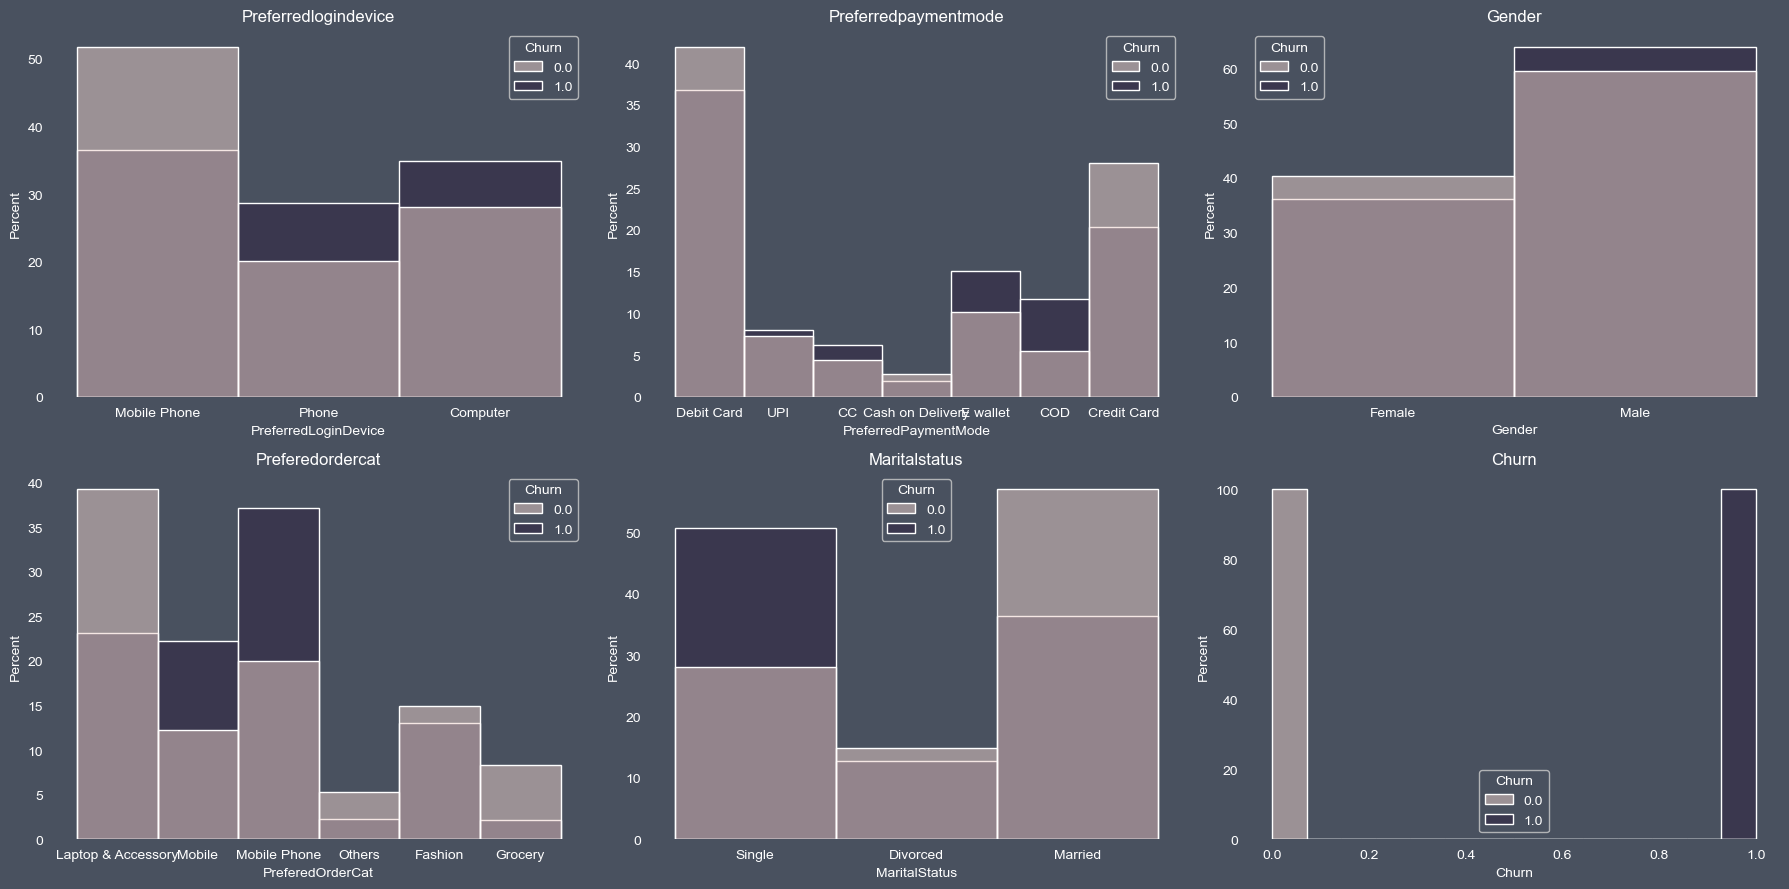

In [11]:
cat_cols = df.select_dtypes(exclude='number').columns.tolist()
cat_cols.append("Churn")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 9))

axes = axes.ravel()

for i, col in enumerate(cat_cols):
    sns.histplot(ax=axes[i], data=df, x=col, stat="percent", common_norm=False, hue="Churn")
    axes[i].set(title=col.capitalize(), xlabel=col)
    axes[i].grid(False)
plt.tight_layout()
plt.show()

#### We see here that few categories from PreferredOrderCat, Marital Status and PreferredPaymentMonde columns are correlated with Churn
Also I'm noticing few duplicated categories in PreferredLoginDevice and PrefredOrderCat

-------------

Text(0.5, 1.0, 'Sorted by CashbackAmount')

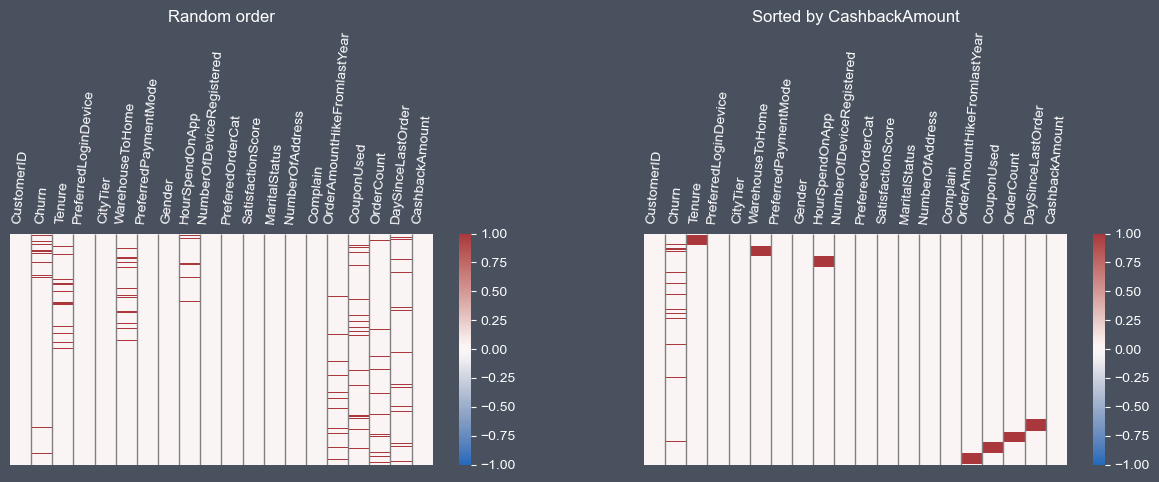

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
axes = axes.ravel()

sns.heatmap(df.isna(), vmin=-1, vmax=1, cmap="vlag", ax=axes[0])
n_cols = df.shape[1]
axes[0].vlines(range(1, n_cols), *axes[0].get_ylim(), colors='grey', linewidths=1)
axes[0].set_yticks([])
axes[0].tick_params(labeltop=True, labelbottom=False)
res = axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=85)
axes[0].set_title("Random order")

axes[1] = sns.heatmap(df.sort_values("CashbackAmount").isna(), vmin=-1, vmax=1, cmap="vlag", ax=axes[1])
n_cols = df.shape[1]
axes[1].vlines(range(1, n_cols), *axes[1].get_ylim(), colors='grey', linewidths=1)
axes[1].set_yticks([])
axes[1].tick_params(labeltop=True, labelbottom=False)
res = axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=85)
axes[1].set_title("Sorted by CashbackAmount")

#### Here I can see that initially it seems that the missing values are completely at random but after closely analyzing the missing values I figured that if I sorted the data by CashbackAMount, we can see it's not completely at Random

I tried to understand if these missing values are random or not, and since I don't have the context where and how this data was collected and what each column is exactly referring to I can't make better judgement on the type of missing data, I'm going to treat this as missing at random.

Although missing in the churn column is seems is completely at random

# Preprocessing

## Imports

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Missing Value

## Na Churns

Since there are rows that column Churn is na, I can't use those rows in classification, so I'm going to save remove those rows from data and use them for later in non classification modelings

In [14]:
df = df[~df["Churn"].isna()]

## Train Test Split

In [15]:
df.set_index("CustomerID", drop=True, inplace=True)
df.drop_duplicates()
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
numeric_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
                'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [17]:
categoric_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
                  'PreferedOrderCat', 'MaritalStatus', 'CityTier', 'Complain']

## Data Imputation

In [18]:
class CategoryTransformer:
    def __init__(self, maps, col_name):
        self.category_maps = maps
        self.col_name = col_name
        
    def transform(self, X, **transform_params):
        for key, val in self.category_maps.items():
            X[self.col_name].replace(key, val, inplace=True)
        return X
    
    def fit(self, X, y= None, **fit_params):
        return self
    
    def fit_transform(self, X, y= None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

In [19]:
PreferredLoginDeviceTransformer = CategoryTransformer({"Phone": "Mobile Phone"}, "PreferredLoginDevice")
PreferedOrderCatTransformer = CategoryTransformer({"Mobile": "Mobile Phone"}, "PreferedOrderCat")

In [20]:
CategoicTransformer = Pipeline([('prefered_order_cat_transformer', PreferedOrderCatTransformer),
                             ('preferred_login_device_transformer', PreferredLoginDeviceTransformer),
                             ('frequent_imputer_categoric', SimpleImputer(strategy="most_frequent")),
                             ('onehot_encoding_categoric', OneHotEncoder(drop="first"))])
NumericTransformer = Pipeline([('median_imputer_numeric', SimpleImputer(strategy="median"))])

In [21]:
transformers = ColumnTransformer([('numerical_transformer', NumericTransformer, numeric_cols),
                                  ('categorical_transformer', CategoicTransformer, categoric_cols)])

In [22]:
transformers

ColumnTransformer(transformers=[('numerical_transformer',
                                 Pipeline(steps=[('median_imputer_numeric',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'OrderAmountHikeFromlastYear', 'CouponUsed',
                                  'OrderCount', 'DaySinceLastOrder',
                                  'CashbackAmount']),
                                ('categori...
                                                  <__main__.CategoryTransformer object at 0x000001B3D7973E50>),
                                                 ('preferred_login_device_transformer',
                                                  <__main__.CategoryTransformer object at 0x000001B3D68F42D0>),
                                                 ('frequent_imputer_categoric',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot_encoding_categoric',
                                                  OneHotEncoder(drop='first'))]),
                                 ['PreferredLoginDevice',
                                  'PreferredPaymentMode', 'Gender',
                                  'PreferedOrderCat', 'MaritalStatus',
                                  'CityTier', 'Complain'])])

# Modeling

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [49]:
params_grid = {'clf__n_estimators': [100, 250, 500],
               'clf__max_features': ['log2', 'sqrt'],
               'clf__max_depth': [10, 50, 100, None],
               'clf__min_samples_split': [1, 2, 4],
               'clf__min_samples_leaf': [2, 5, 10],
               'clf__bootstrap': [True, False],
               'clf__class_weight': ['balanced']}

In [50]:
pipeline = Pipeline(steps=[("preprocessing", transformers), ("clf", RandomForestClassifier())])

In [51]:
clf_search = GridSearchCV(pipeline, param_grid=params_grid, scoring=make_scorer(f1_score , average='macro'), n_jobs=1, verbose=1, cv=5)

In [52]:
clf_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numerical_transformer',
                                                                         Pipeline(steps=[('median_imputer_numeric',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'HourSpendOnApp',
                                                                          'NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'OrderAmountHikeFromlastYear',
                                                                          'CouponUsed',
                                                                          '...
                                                                          'Complain'])])),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=1,
             param_grid={'clf__bootstrap': [True, False],
                         'clf__class_weight': ['balanced'],
                         'clf__max_depth': [10, 50, 100, None],
                         'clf__max_features': ['log2', 'sqrt'],
                         'clf__min_samples_leaf': [2, 5, 10],
                         'clf__min_samples_split': [1, 2, 4],
                         'clf__n_estimators': [100, 250, 500]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [53]:
clf_search.best_params_

{'clf__bootstrap': False,
 'clf__class_weight': 'balanced',
 'clf__max_depth': 50,
 'clf__max_features': 'log2',
 'clf__min_samples_leaf': 2,
 'clf__min_samples_split': 2,
 'clf__n_estimators': 100}

In [54]:
best_clf = clf_search.best_estimator_

In [55]:
print(classification_report(y_test, best_clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       457
         1.0       0.94      0.91      0.92        79

    accuracy                           0.98       536
   macro avg       0.96      0.95      0.95       536
weighted avg       0.98      0.98      0.98       536



In [59]:
from joblib import dump, load

In [57]:
dump(best_clf, "clf3.joblib")

['clf3.joblib']